## Installing all packages

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Reading from the csv file

In [3]:
matches_df = pd.read_csv('each_match_records.csv')
#type(matches_df)
matches_df

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Rashid Khan
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,JC Buttler
4,2023,02-04-2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,F du Plessis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,21-05-2023,70,Group,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Nitin Menon,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,NaN,6.0,Shubman Gill
70,2023,23-05-2023,71,Qualifier,MA Chidambaram Stadium,Chennai,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,AK Chaudhary,CB Gaffaney,VK Sharma,M Nayyar,Chennai Super Kings,15.0,NaN,RD Gaikwad
71,2023,24-05-2023,72,Eliminator,MA Chidambaram Stadium,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81.0,NaN,Akash Madhwal
72,2023,26-05-2023,73,Qualifier,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62.0,NaN,Shubman Gill


Primary Objectives
- No of matches won by fielding first and batting first
- Does winning the toss imply winning the match?
- Most man of the match titles(can also find out whether bowlers are awarded man of the match awards or batters are)
- Which venue supports winning as well as frequency of the venues used 

In [4]:
columns_to_drop = ['winner_runs','winner_wickets']
matches_df = matches_df.drop(columns=columns_to_drop)
matches_df

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,Rashid Khan
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,JC Buttler
4,2023,02-04-2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,F du Plessis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,21-05-2023,70,Group,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Nitin Menon,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,Shubman Gill
70,2023,23-05-2023,71,Qualifier,MA Chidambaram Stadium,Chennai,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,AK Chaudhary,CB Gaffaney,VK Sharma,M Nayyar,Chennai Super Kings,RD Gaikwad
71,2023,24-05-2023,72,Eliminator,MA Chidambaram Stadium,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,Akash Madhwal
72,2023,26-05-2023,73,Qualifier,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,Shubman Gill


In [5]:
# primary objective 1
# number of matches won by fielding first and batting first
# did the match who won the toss also win the match?
toss_won_match_won_df = matches_df['toss_won'] == matches_df['winner']
print(toss_won_match_won_df)

0      True
1     False
2     False
3     False
4      True
      ...  
69     True
70    False
71     True
72    False
73     True
Length: 74, dtype: bool


In [6]:
print("the number of matches where the team winning the toss also won the match {}".format(toss_won_match_won_df.sum()))
print("the number of matches where the team winning the toss did not win the match {}".format(74 - toss_won_match_won_df.sum()))


the number of matches where the team winning the toss also won the match 34
the number of matches where the team winning the toss did not win the match 40


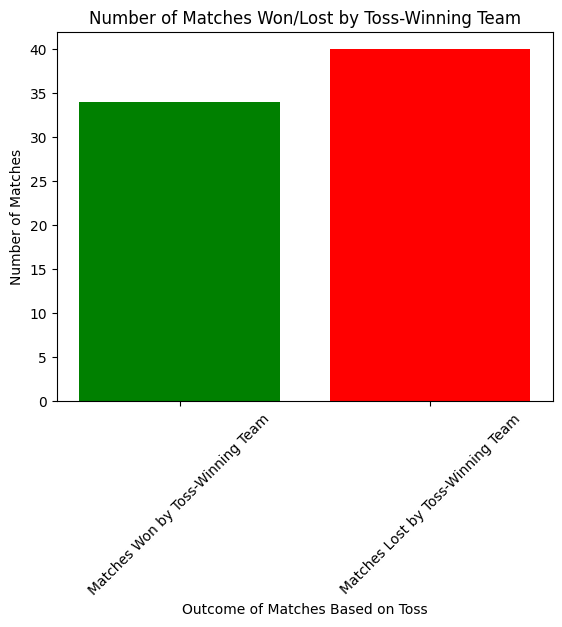

In [7]:
matches_won_toss_and_match = toss_won_match_won_df.sum() 
matches_lost_toss_won_match = 74 - toss_won_match_won_df.sum() 

categories = ['Matches Won by Toss-Winning Team', 'Matches Lost by Toss-Winning Team']
counts = [matches_won_toss_and_match, matches_lost_toss_won_match]

plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('Outcome of Matches Based on Toss')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Won/Lost by Toss-Winning Team')
plt.xticks(rotation=45)
plt.show()

In [8]:
bool_df = matches_df['team1'] == matches_df['toss_won']
l = list()

for index, tf in enumerate(bool_df):
    if not tf:
        l.append(matches_df.at[index, 'team1'])
    else:
        l.append(matches_df.at[index, 'team2'])

matches_df['toss_lost'] = l

In [9]:
batting_first_wins = matches_df[(matches_df['toss_decision'] == 'bat') & (matches_df['toss_won'] == matches_df['winner'])] #the team which has won the toss, won the match and their decision after winning the toss was to bat
# the team which chose to bot, did not win the toss, but won the match

fielding_first_wins = matches_df[(matches_df['toss_decision'] == 'field') & (matches_df['toss_won'] == matches_df['winner'])]
num_batting_first_wins = batting_first_wins.shape[0]
num_fielding_first_wins = fielding_first_wins.shape[0]
print(f"Matches won by batting first: {num_batting_first_wins}") 
print("Matches won by fielding first :", num_fielding_first_wins)


Matches won by batting first: 11
Matches won by fielding first : 23


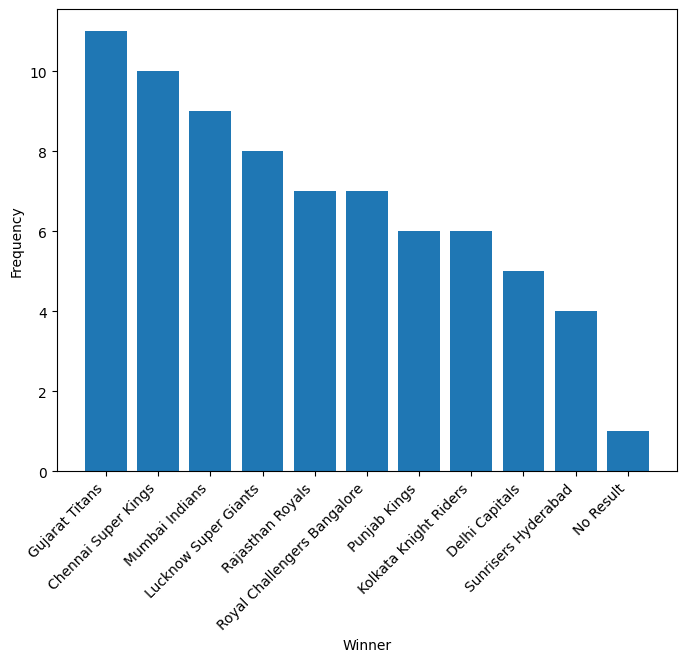

In [10]:
frequency_series = matches_df['winner'].value_counts()
frequency_list = frequency_series.reset_index().values.tolist()
categories, frequencies = zip(*frequency_list)

plt.figure(figsize=(8,6))
plt.bar(categories,frequencies)
plt.xlabel('Winner')
plt.ylabel('Frequency')
plt.xticks(rotation = 45,ha='right')
plt.show()

#### Individual Performace 

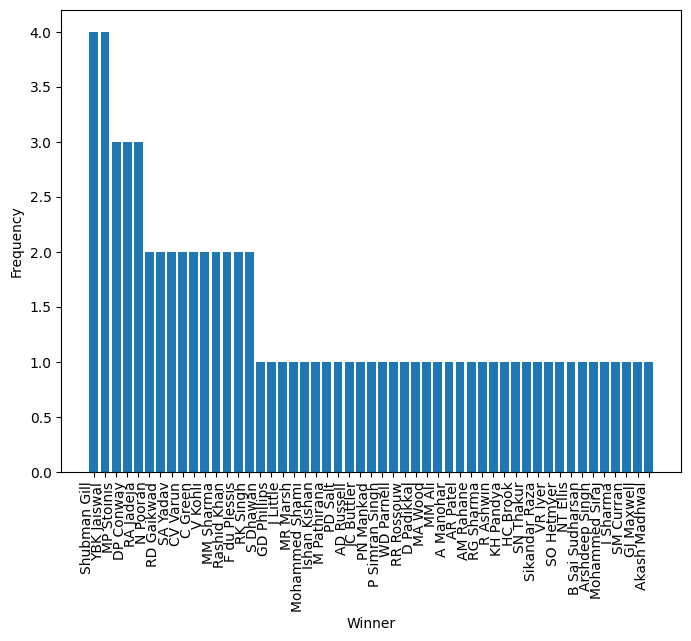

In [11]:
frequency_series = matches_df['man_of_match'].value_counts()
frequency_list = frequency_series.reset_index().values.tolist()
categories, frequencies = zip(*frequency_list)

plt.figure(figsize=(8,6))
plt.bar(categories,frequencies)
plt.xlabel('Winner')
plt.ylabel('Frequency')
plt.xticks(rotation = 90,ha='right')
plt.show()

In [15]:
rcb = matches_df.loc[(matches_df['team1'] == 'Royal Challengers Bangalore') | (matches_df['team2'] == 'Royal Challengers Bangalore')]
win_list = list()
lose_list = list()
winner_series  = rcb['winner'] == "Royal Challengers Bangalore"
winner_series.sum()

7